In [1]:
import numpy as np
import matplotlib.pyplot as plt

r, v_obs, v_err, v_disk, v_gas, v_bulge = np.loadtxt('NGC2998.txt', skiprows=1, usecols=(0, 1, 2, 3, 4, 5), unpack=True)

# Excersise 2.2 Modified Newtonian Dynamics
## 1. Plot rotation curve data with uncertainty of NGC 2998

data from http://astroweb.case.edu/ssm/620f03/n2998.dat

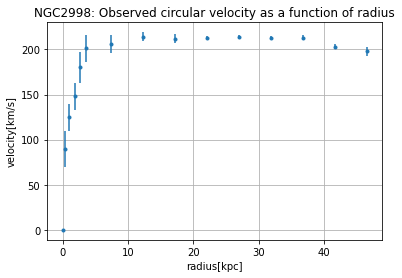

In [2]:
plt.errorbar(r, v_obs, yerr = v_err, fmt=".")
plt.title("NGC2998: Observed circular velocity as a function of radius")
plt.grid()
plt.xlabel("radius[kpc]")
plt.ylabel("velocity[km/s]")
plt.show()

## 2. Test MOND theory by data fitting
In MOND theory, the gravitaional acceleration $a$ is scaled by postulating a modified Newton's first law:
\begin{equation*}
\mu(\frac{a}{a_0})a=\frac{GM}{R^2};
    \mu(\frac{a}{a_0})=\left\{
                \begin{array}{ll}
                  \frac{a}{a_0}, a \ll a_0\\
                  1, a \gg a_0\\
                \end{array}
              \right.
\end{equation*}

Here use the number $a_0 = 1.2\cdot10^{-10}$ m/s, $M_{visible} = 24.4\cdot10^40$ kg and $G = 6.67\cdot10^{-11} m^3 {kg}^{-1} s^{-2}$

In [3]:
from scipy.optimize import curve_fit
from astropy import units as u

r = (r*u.kpc).to(u.meter)
a0 = 1.2e-10*u.m/(u.s)**2
M_vis = 24.4e40*u.kg         # kg
G = 6.67e-11*(u.m)**3/u.kg/u.s**2

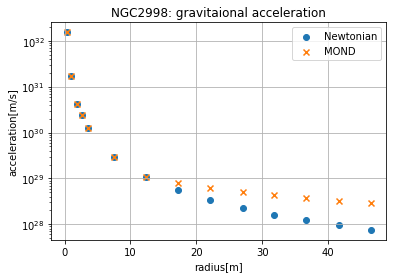

In [6]:
def Newton(R):
    return G*M_vis/R**2

def MOND(R):
    res = Newton(R)
    res[(res < 0.5*a0)] = np.sqrt(res[(res < 0.5*a0)] * a0)
    return res

#fitp, pcov = curve_fit(MOND, r, v_obs, [1.0])
#plt.plot(r, MOND(r, fitp[0], fitp[1]), label='MOND fit')
plt.scatter(r, Newton(r), label = "Newtonian")
plt.scatter(r, MOND(r), marker = "x", label = "MOND")
plt.title("NGC2998: gravitaional acceleration")
plt.grid()
plt.xlabel("radius[m]")
plt.ylabel("acceleration[m/s]")
plt.legend()
plt.yscale("log")
plt.show()

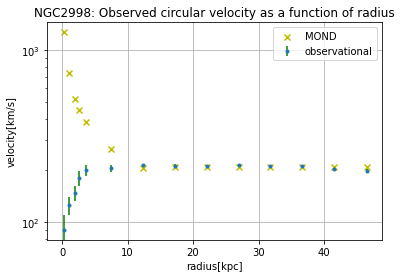

In [17]:
v_MOND = np.sqrt(MOND(r)*r)
r = r.to(u.kpc)
#fitp, pcov = curve_fit(MOND, r, v_obs, [1.0])
#plt.plot(r, MOND(r, fitp[0], fitp[1]), label='MOND fit')
plt.errorbar(r.value, v_obs, yerr = v_err, fmt=".", ecolor = "g", label = "observational")
plt.scatter(r.to(u.kpc), v_MOND.to(u.km/u.s), marker = "x", c = "y", label = "MOND")
plt.title("NGC2998: Observed circular velocity as a function of radius")
plt.grid()
plt.legend()
plt.yscale("log")
plt.xlabel("radius[kpc]")
plt.ylabel("velocity[km/s]")
plt.show()